## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [28]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
import pandas as pd

def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

data_path = "motorbike_ambulance_calls.csv"

In [5]:
data = get_data(data_path)


print("Основна статистична інформація по числовим змінним:")
print(data.describe())


print("\nМаксимальні значення по всім змінним:")
print(data.max())
print("\nМінімальні значення по всім змінним:")
print(data.min())


print("\nРозмірність датасету:")
print(data.shape)

Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [6]:
print("Перевірка типів даних:")
print(data.dtypes)


print("\n Перевірка кількості даних по кожній змінній:")
print(data.count())

Перевірка типів даних:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

 Перевірка кількості даних по кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [7]:
print("Перевірка пропусків в кожній змінній:")
print(data.isnull().sum())


Перевірка пропусків в кожній змінній:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1.   По змінних, які вивелися, ми можемр побачити, що кількість взятих велосипедів напрокат дуже змінюється кожен день, але в середньому становить 189 
2.   Можемо побачити,що в нас є такі змінні, як пора року, погода та теіпература, по цих даних можна буде вивести наприклад в яку погоду, чи пору року найбіший попит на велосипеди 
3. В цьому завданні ми можемо побачити, що наші змінні не мають пропусків, вони всі заповнені значеннями



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [8]:
import pandas as pd

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df


In [9]:
data = transform_date(data, 'date')
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"Перший день датасету - {first_day}.\nОстанній день датасету - {last_day}")

get_time_limits(data, 'date')

Перший день датасету - 2011-01-01 00:00:00.
Останній день датасету - 2012-12-31 00:00:00


/var/folders/13/kwt6kx_106sf3ybd4yv8snf00000gp/T/ipykernel_34144/4113636490.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


Ми вивели період за який датасет включав свої дані

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [10]:
data_categorical = data.select_dtypes(include=['object', 'category'])
print(data_categorical.head())

   season
0  spring
1  spring
2  spring
3  spring
4  spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [11]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].map({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4})
  return df
  
data = encode_season(data, 'season')
print(data.head())

   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01       1   0     1   0        0        6           0   
1      2 2011-01-01       1   0     1   1        0        6           0   
2      3 2011-01-01       1   0     1   2        0        6           0   
3      4 2011-01-01       1   0     1   3        0        6           0   
4      5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

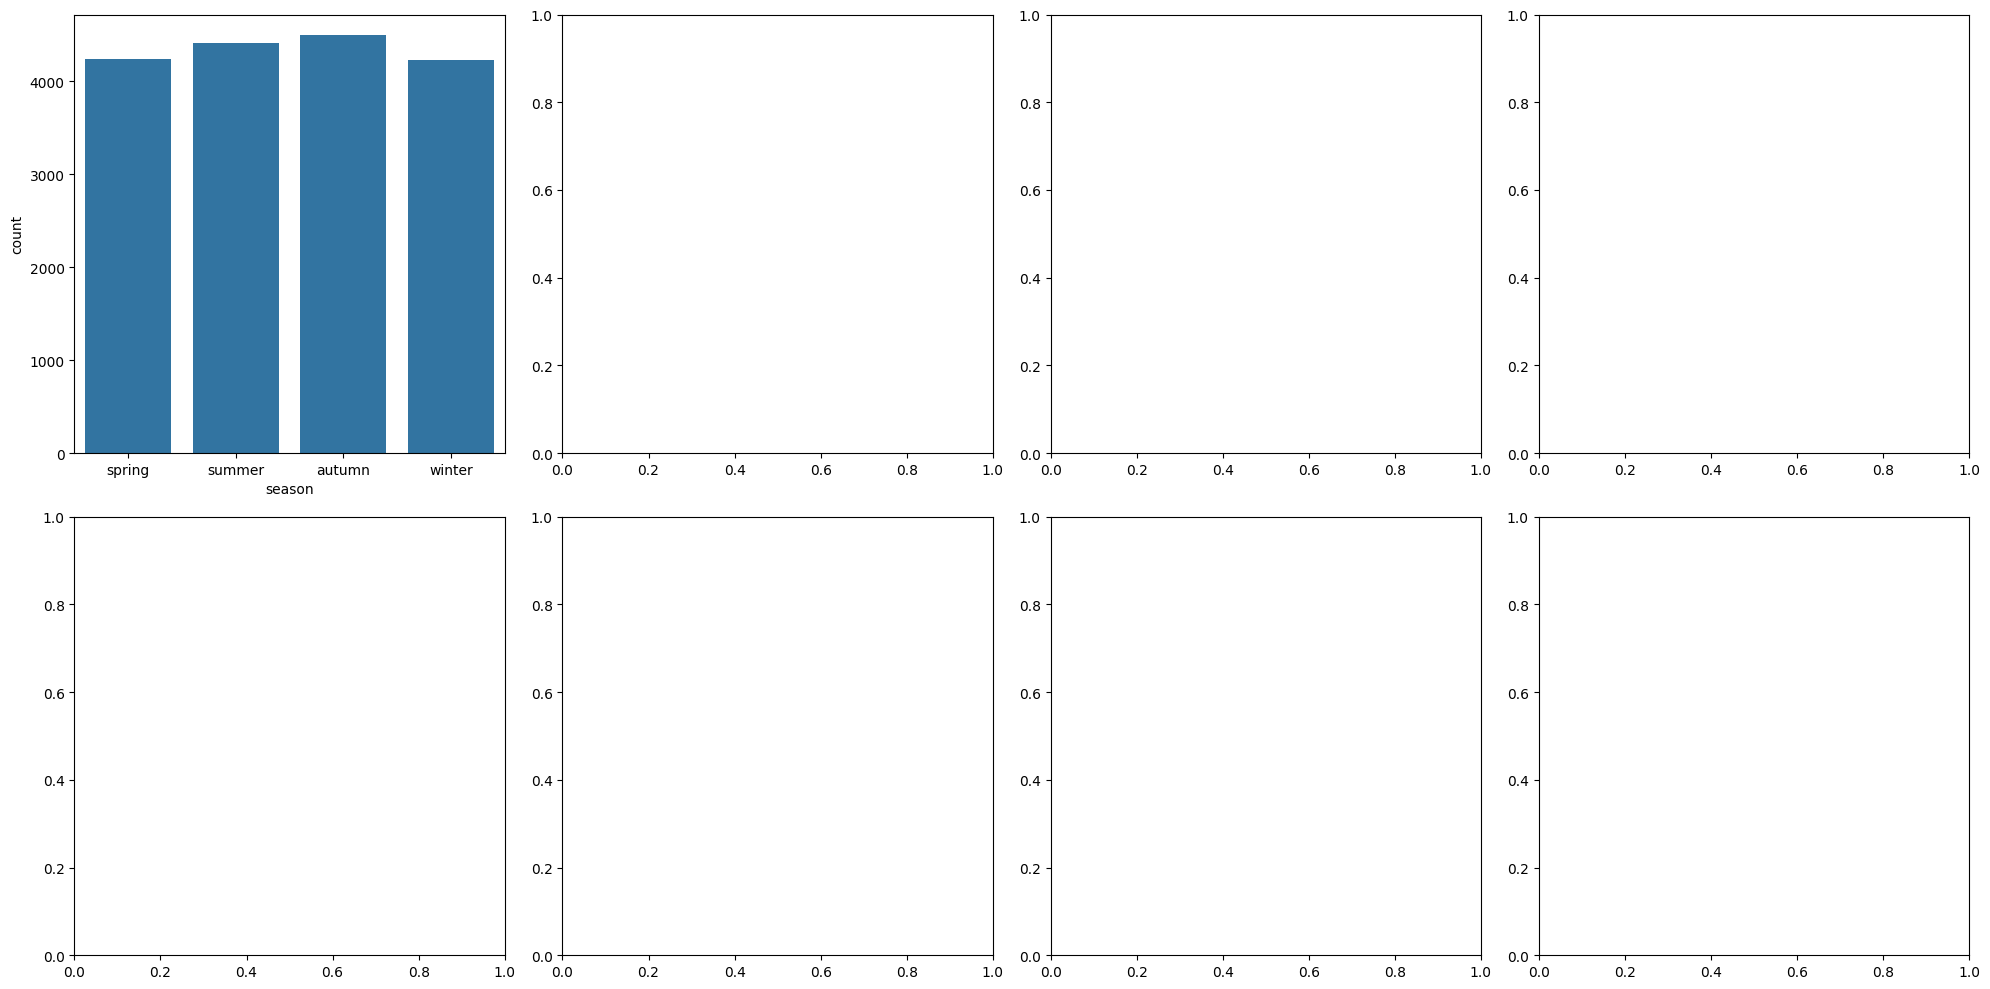

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=variable, data=data_categorical, ax=subplot)

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



5.   Ми виділили категоріальні змінні в окремий датасет, подальше це нам може пригодитися для аналізу даних
6.   Ми значенняя пори року змінили на числа 1, 2, 3, 4, і в нас це успішно вийшло
7.   Графік показує, що найбільша кількість відвідувачів є весною



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [13]:
data_numerical = data.select_dtypes(include='number')
print(data_numerical.head())

   index  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0      1       1   0     1   0        0        6           0           1   
1      2       1   0     1   1        0        6           0           1   
2      3       1   0     1   2        0        6           0           1   
3      4       1   0     1   3        0        6           0           1   
4      5       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

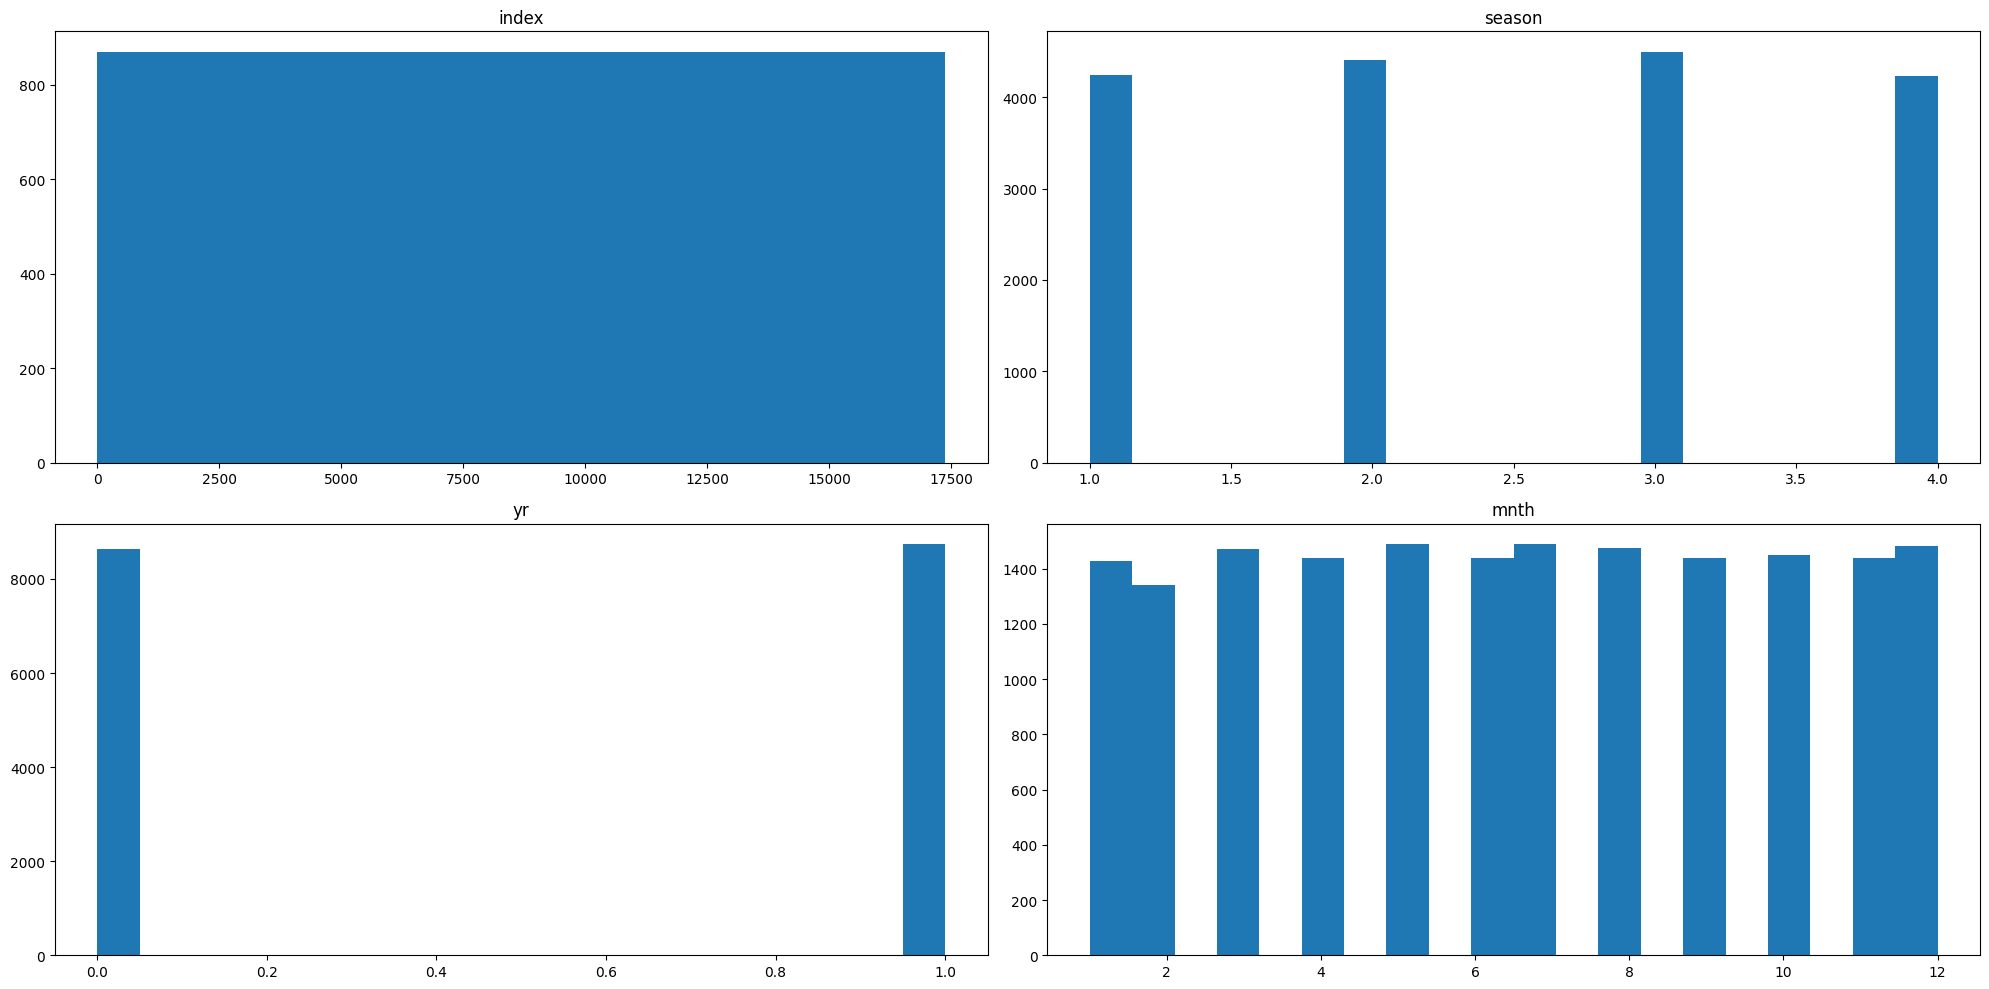

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, variable in enumerate(data_numerical.columns):
    if i < 4:  
        data_without_nan = data_numerical[variable].dropna()
        ax[i // 2, i % 2].hist(data_without_nan, bins=20)
        ax[i // 2, i % 2].set_title(variable)

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

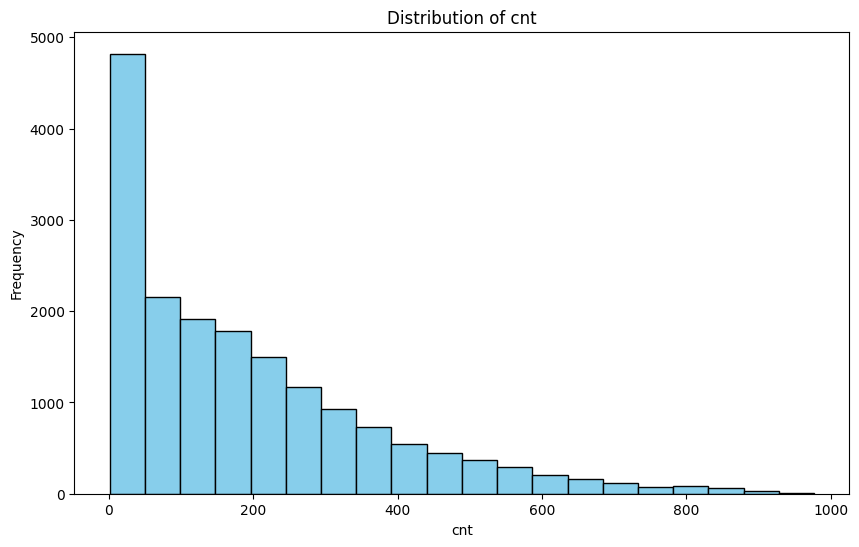

NameError: name 'X' is not defined

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
target_variable = 'cnt'
target_data = data[target_variable]

plt.figure(figsize=(10, 6))
plt.hist(target_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.show()
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model = LinearRegression()
model.fit(X_imputed, y)


slope_coefficient = model.coef_
print("Slope Coefficient:", slope_coefficient)

**Висновки з 8-10 завдання (детальні)**



8.  По результату ми бачимо, що всі наші змінні мають числові значенняя, окрім season він є NaN  
9.  В діаграмі index в нас вийшов майже нормальний розподіл даних,а ось в season в нас не вийшло, адже відсутні значення для цієї змінної
10. Щодо вигляду нашої гістограми, ми можемо побачити що більшість значень є з лівої частини графіка, тобто вона має лівосторонній перекіс, виходить що цільова змінна негативно корилює з іншими змінними



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

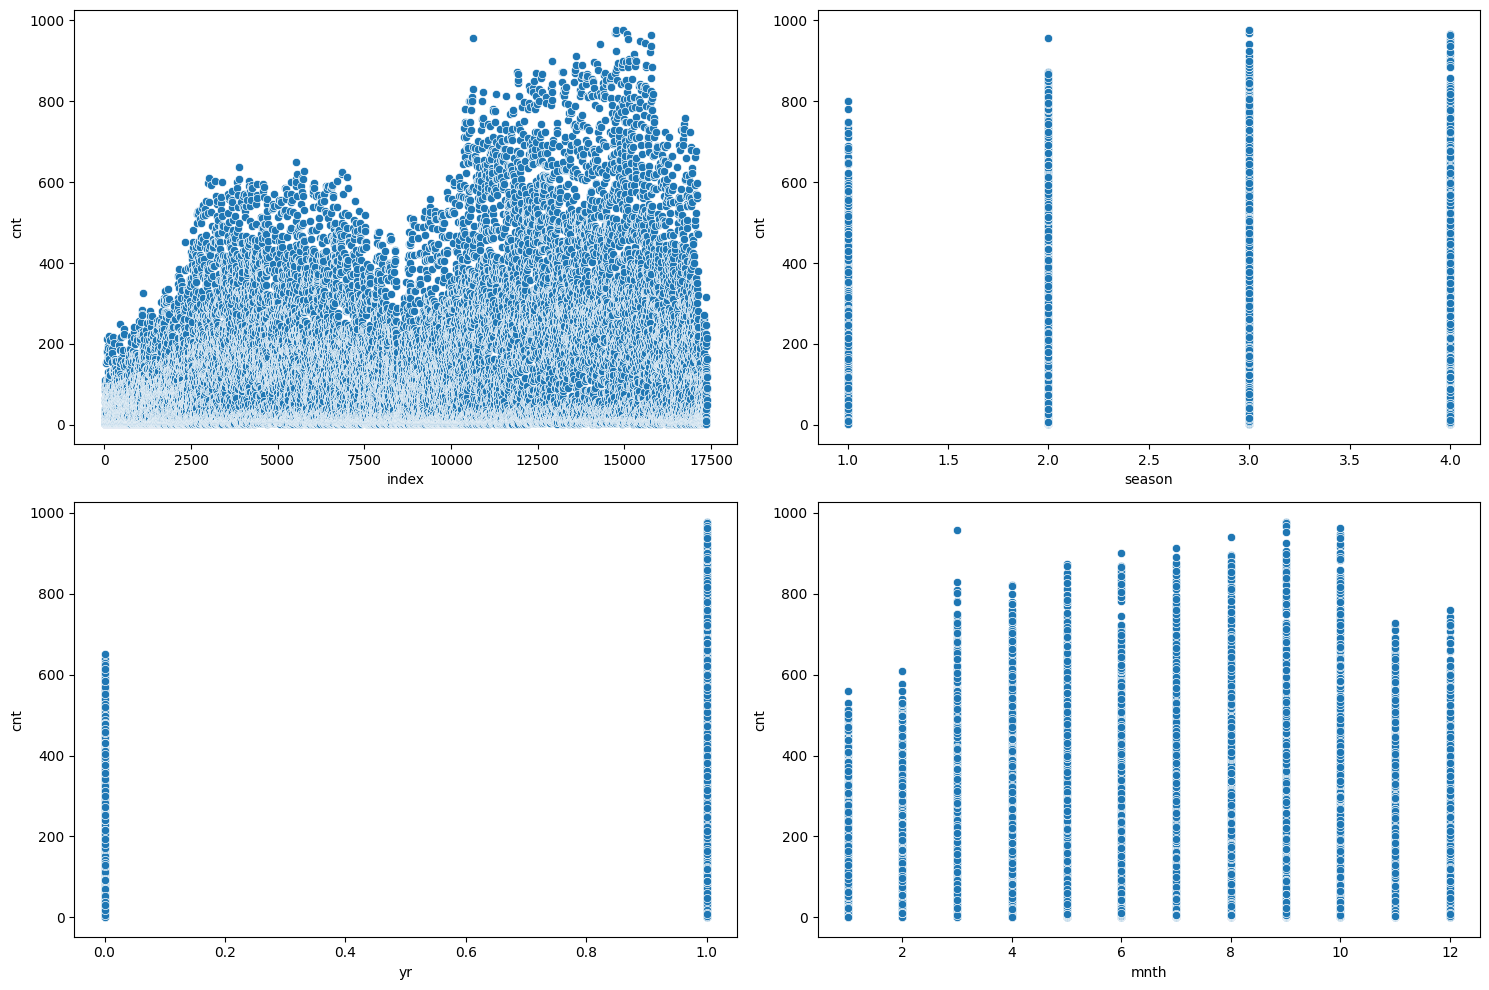

In [32]:
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data, ax=subplot)

plt.tight_layout()
plt.show()

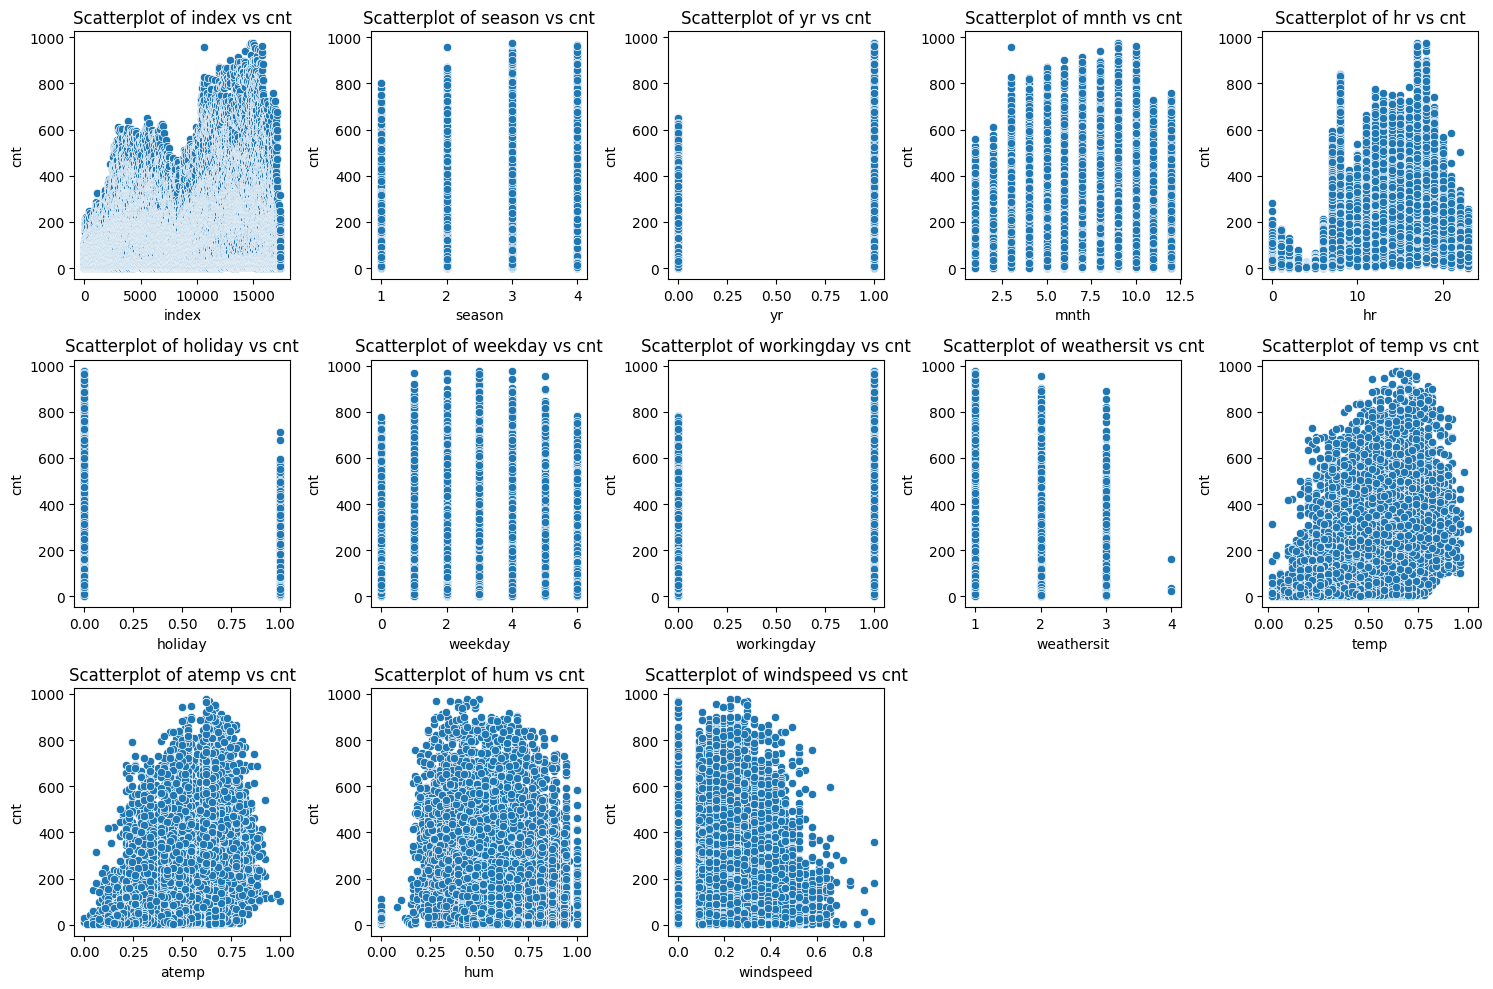

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_vars.remove('cnt')


plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(x=var, y='cnt', data=data)
    plt.title(f'Scatterplot of {var} vs cnt')

plt.tight_layout()
plt.show()


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

IndexError: index 3 is out of bounds for axis 0 with size 3

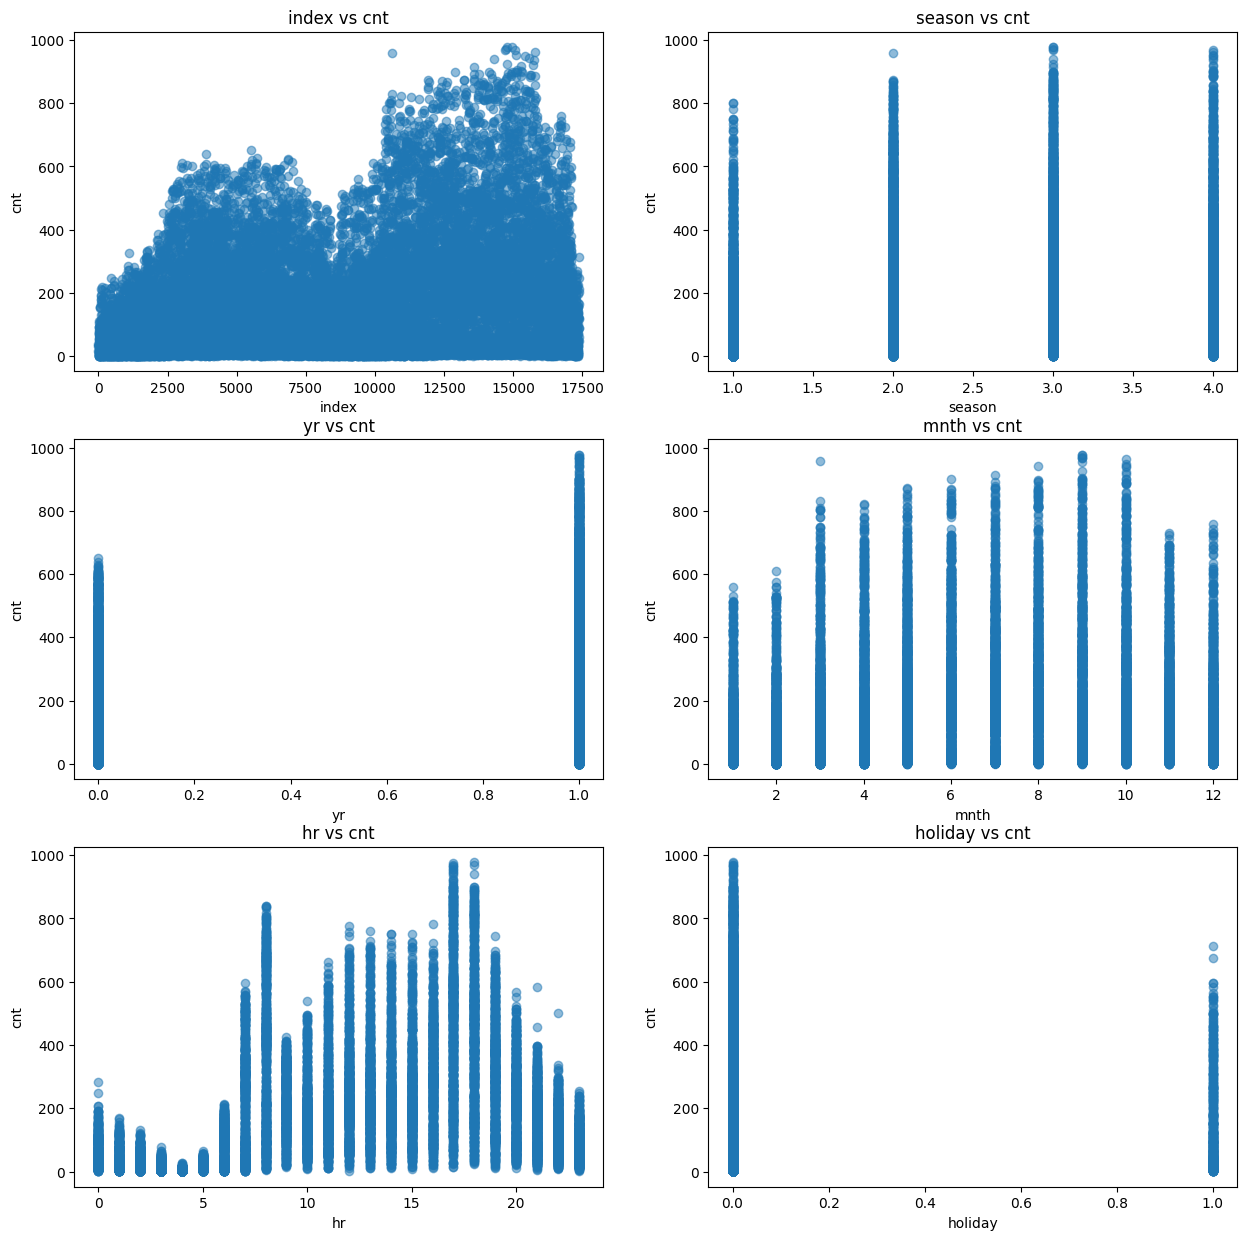

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(data_numerical.drop('cnt', axis=1).columns):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(data_numerical[column], data_numerical['cnt'], alpha=0.5)
    ax[row, col].set_title(f'{column} vs cnt')
    ax[row, col].set_xlabel(column)
    ax[row, col].set_ylabel('cnt')


plt.tight_layout()
plt.show()

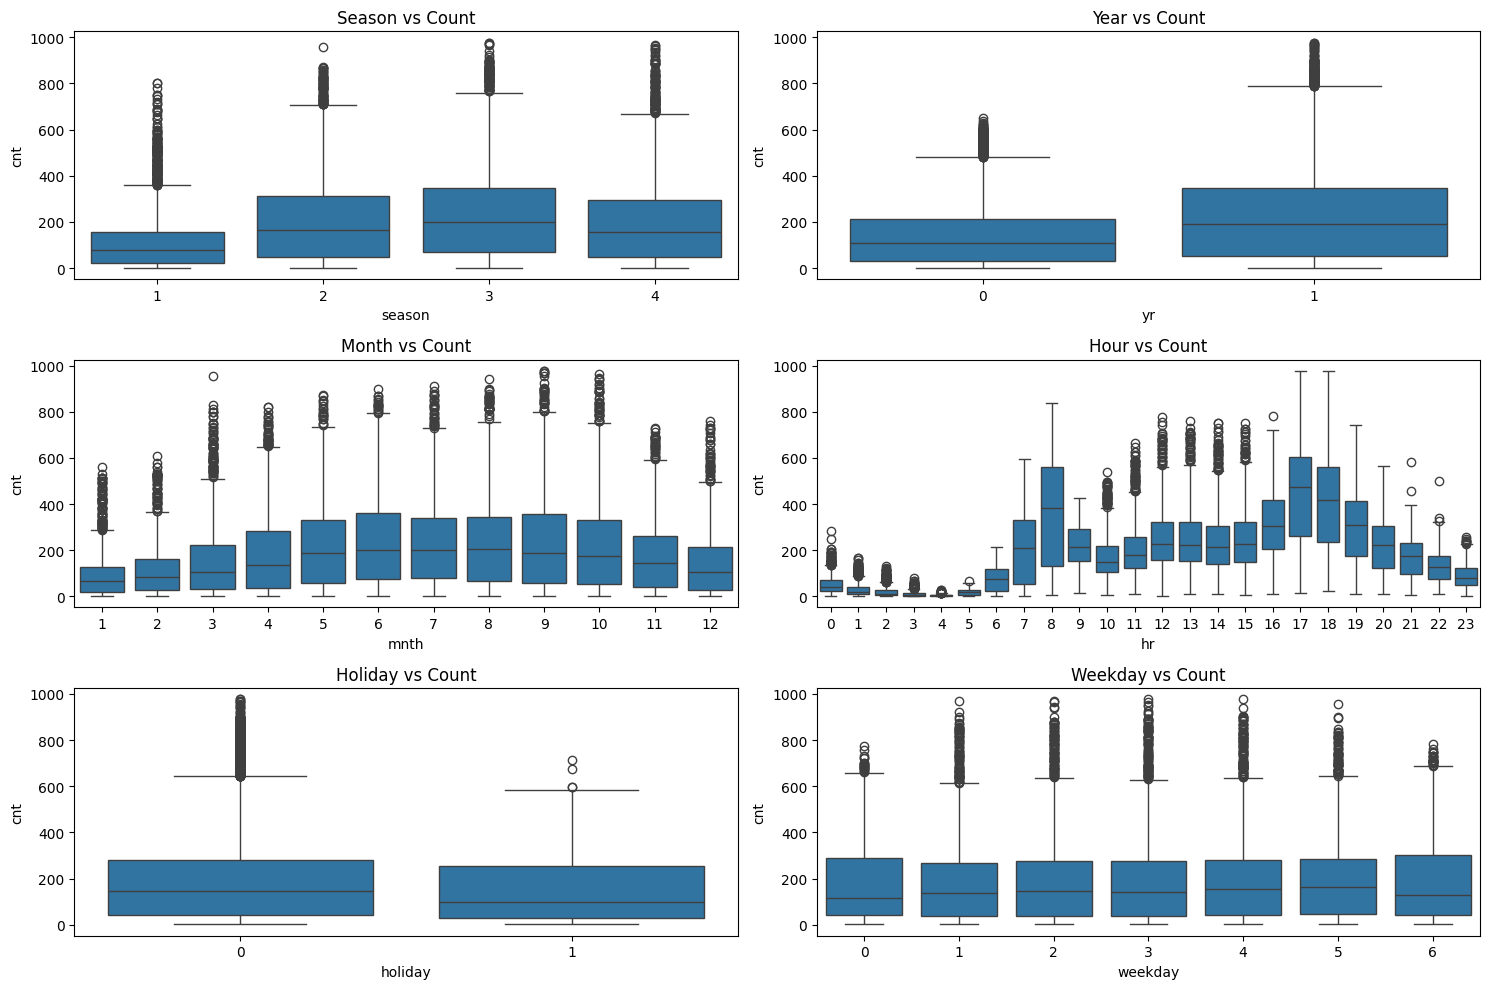

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Season vs Count')

plt.subplot(3, 2, 2)
sns.boxplot(x='yr', y='cnt', data=data)
plt.title('Year vs Count')

plt.subplot(3, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.title('Month vs Count')

plt.subplot(3, 2, 4)
sns.boxplot(x='hr', y='cnt', data=data)
plt.title('Hour vs Count')

plt.subplot(3, 2, 5)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.title('Holiday vs Count')

plt.subplot(3, 2, 6)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title('Weekday vs Count')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



11.    Побудовали графік співвідношення між числовими змінними та цільовою змінною cnt
12.   Вивели графіки, на яких можемо визначити співвідношенняя між категоральними та цільовою змінною.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

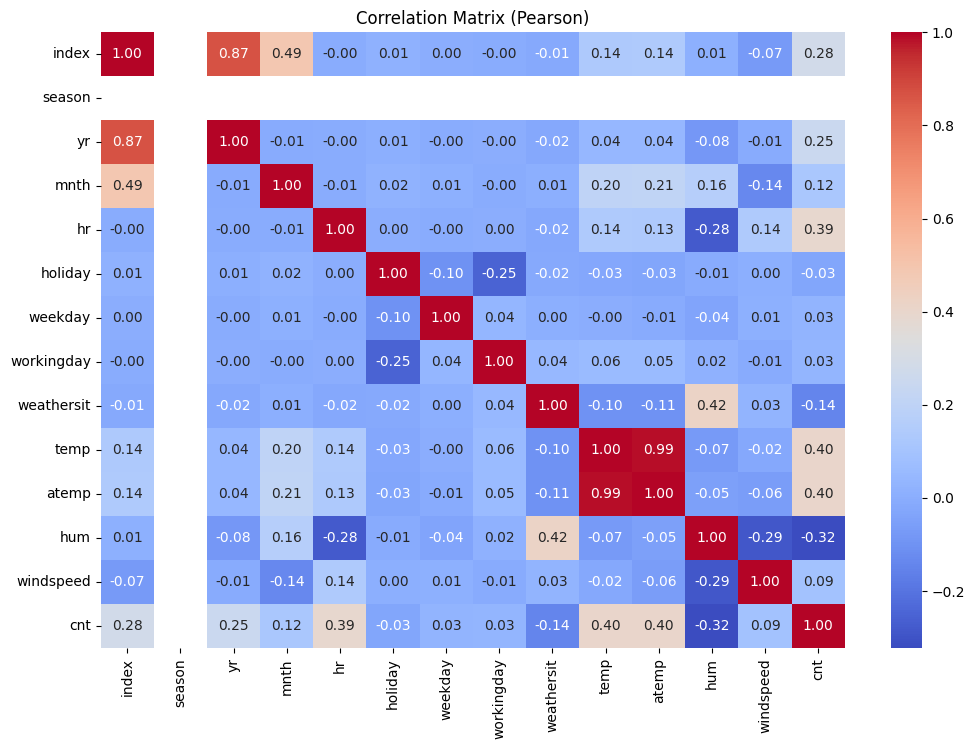

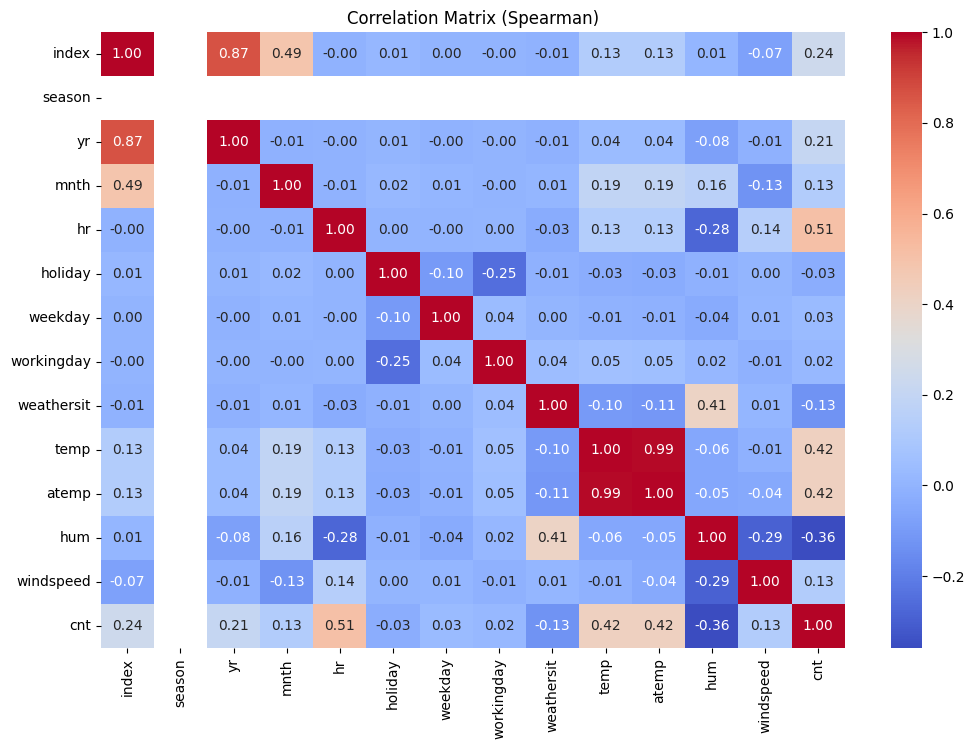

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_pearson = data_numerical.corr(method='pearson')


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson)')
plt.show()

correlation_spearman = data_numerical.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Spearman)')
plt.show()


По матриці Пірсона ми можемо побачити, що значення позитивної кореляяції є між temp та atemp, а також cnt та windspeed. А Сильно негативні між wheathersit та hum, а також між windspeed та hum. Все інше в нас помірні кореляції.
Щодо матриці спірмана можна зауважити, що температура та вологість добре корелюють, тобто коли темп високо , вологість також висока. Також можемо побачити, що температура та кількість опадів негативно корелюють, наприклад коли температура висока опадів менше

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [26]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['hr'], prefix='hr'),
                          pd.get_dummies(df['yr'], prefix='yr'),
                          pd.get_dummies(df['holiday'], prefix='holiday'),
                          pd.get_dummies(df['workingday'], prefix='workingday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return fetures

In [27]:
features = get_dummies(data)

NameError: name 'fetures' is not defined

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64


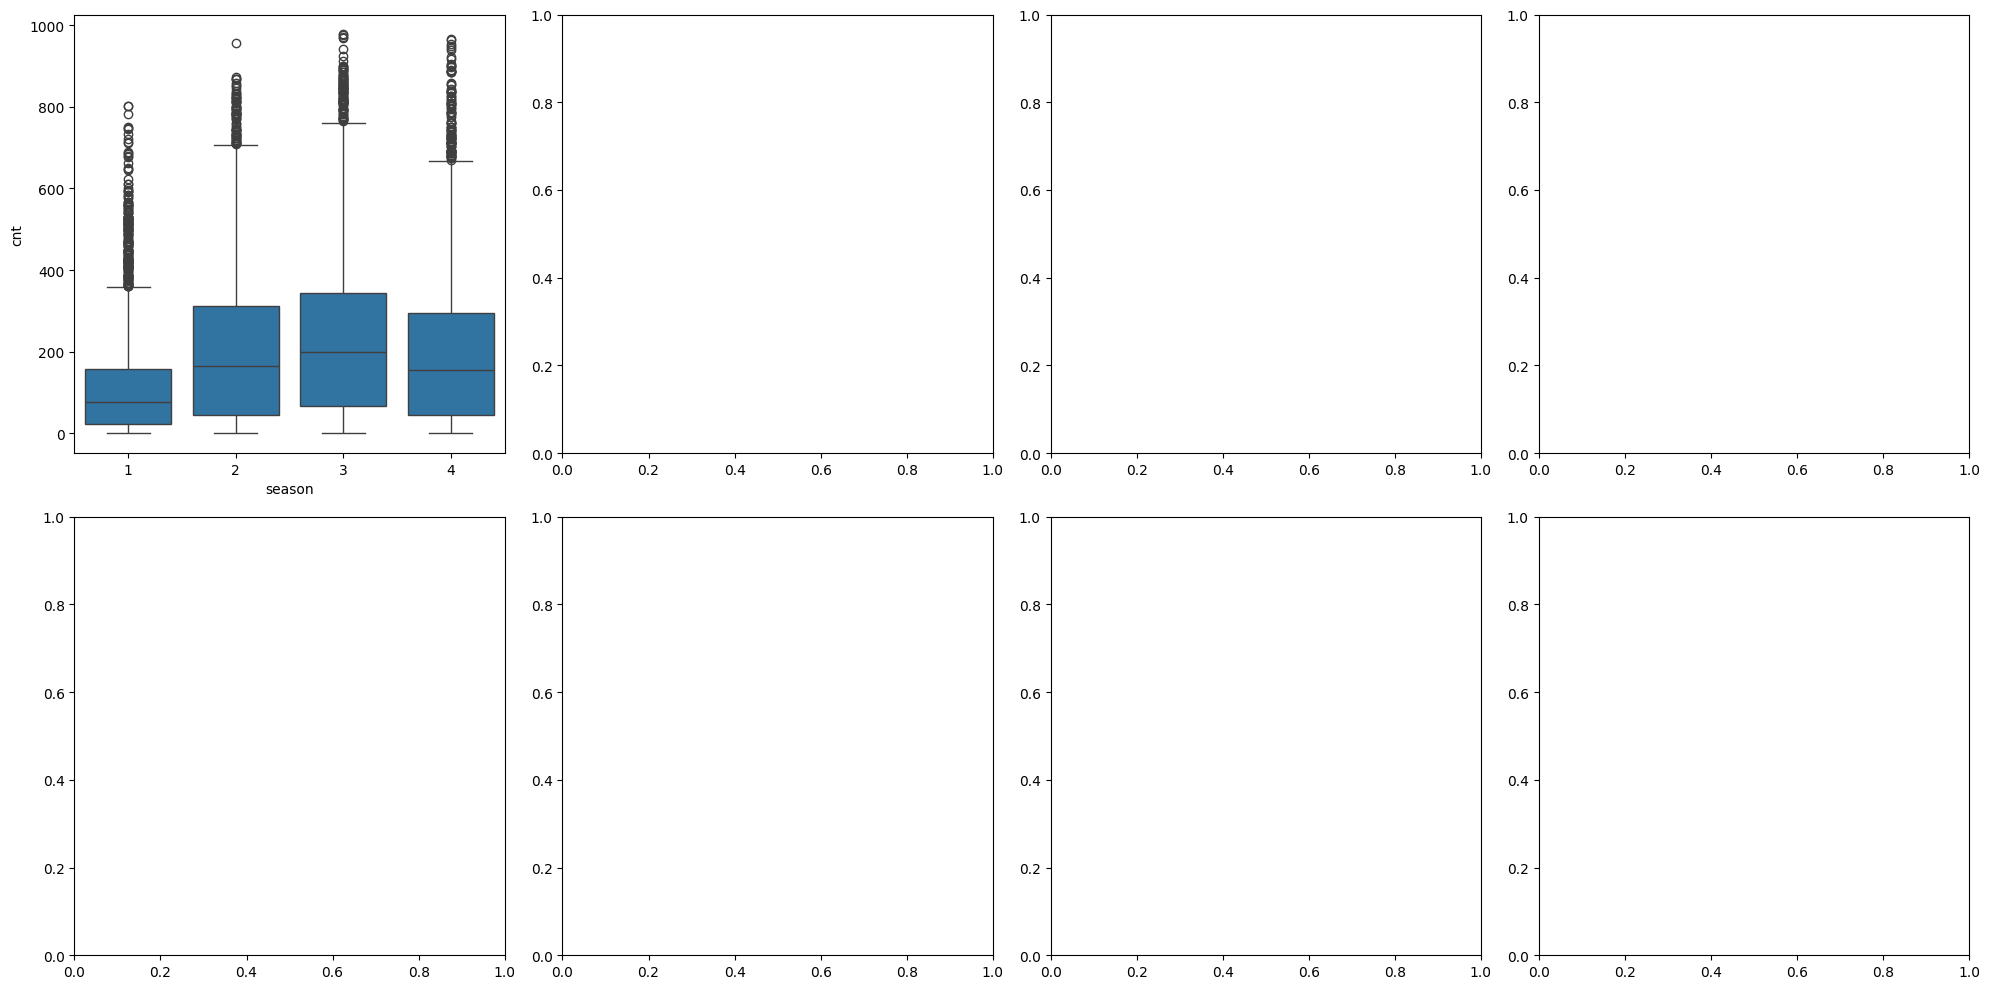

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
         pd.get_dummies(df['season'], prefix='season'),
         pd.get_dummies(df['hr'], prefix='hr'),
         pd.get_dummies(df['yr'], prefix='yr'),
         pd.get_dummies(df['holiday'], prefix='holiday'),
         pd.get_dummies(df['workingday'], prefix='workingday'),
         pd.get_dummies(df['weathersit'], prefix='weathersit')
                         ], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

print(data.isnull().sum())
print(data['season'].head())

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data_numerical, ax=subplot)
plt.tight_layout()
plt.show()
features = get_dummies(data)


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [17]:
features['night_hours'] = ((features['hr'] >= 22) | (features['hr'] < 6)).astype(int)
features = features.drop('hr', axis=1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [19]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

KeyError: "['spring', 'mnth_4', 'weekday_0'] not found in axis"

In [20]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target, 'spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp', 'date'])
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)


NameError: name 'features_lr' is not defined

In [22]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

NameError: name 'X_train' is not defined

In [23]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

NameError: name 'model' is not defined

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [24]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

NameError: name 'y_train_pred' is not defined

**Висновки з завдання (детальні)**



1.  Створені фіктивні змінні для уникнення неправильного порядку категорій.  
2.  Видалили date i atemp, тому що вони можуть бути менш інформативні, а також повторюватися інформація з іншими змінними
3.  Якщо залишки розподілені рівномірно навколо нуля, без виражених систематичних відхилень, це може свідчити про те, що модель добре адаптується до даних.

